# Example of correctly formatting data

For use in decoding (see "Examples_all_decoders" and "Examples_kf_decoder"), we need the following format of inputs:
- Neural data should be a matrix of size "number of time bins" x "number of neurons", where each entry is the firing rate of a given neuron in a given time bin
- The output you are decoding should be a matrix of size "number of time bins" x "number of features you are decoding"

In this example, we load Matlab data that contains 
- The spike times of all neurons. In Matlab, "spike_times" is a cell of size "number of neurons" x 1. Within spike_times{i} is a vector containing all the spike times of neuron i.
- A continuous stream of the output variables. In this example, we are aiming to decode velocity. In Matlab, "vels" is a matrix of size "number of recorded time points" x 2 (x and y velocities were recorded) that contains the x and y velocity components at all time points. "vel_times" is a vector that states the time at all recorded time points. 

We will put this data in the format described above, with the help of the functions "bin_spikes" and "bin_output" that are in the file "preprocessing_funcs.py"




## Import packages and functions

In [1]:
###Import standard packages###
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.debugger import Tracer  # Tracer()() 

###Import functions for binning data for preprocessing###
from preprocessing_funcs import bin_spikes
from preprocessing_funcs import bin_output

## Load Data
The data for this example can be downloaded at this [link](https://www.dropbox.com/sh/n4924ipcfjqc0t6/AACPWjxDKPEzQiXKUUFriFkJa?dl=0&preview=s1_data_raw.mat)

It was recorded by Raeed Chowdhury from Lee Miller's lab at Northwestern.

In [2]:
#   ORIGINAL CODE   #
###Load Data###
folder='' #ENTER THE FOLDER THAT YOUR DATA IS IN
folder='/Users/paulmiddlebrooks/Dropbox/local_data/'   # I copied the example data to my local_data folder for now
data=io.loadmat(folder+'s1_data_raw.mat')
spike_times=data['spike_times'] #Load spike times of all neurons
vels=data['vels'] #Load x and y velocities
vel_times=data['vel_times'] #Load times at which velocities were recorded


# ###Load Data###
# folder='/Users/paulmiddlebrooks/Dropbox/local_data/joule/' #ENTER THE FOLDER THAT YOUR DATA IS IN
# # folder='/Users/jig289/Dropbox/MATLAB/Projects/In_Progress/BMI/Processed_Data/' 
# data=io.loadmat(folder+'jp083n02.mat')
# spike_times=data['spike_times'] #Load spike times of all neurons
# # vels=data['vels'] #Load x and y velocities
# # vel_times=data['vel_times'] #Load times at which velocities were recorded

[[  1.17000000e+00]
 [  1.18000000e+00]
 [  1.19000000e+00]
 ..., 
 [  3.06814000e+03]
 [  3.06815000e+03]
 [  3.06816000e+03]]


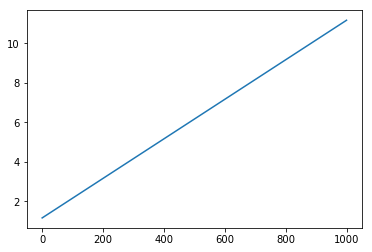

In [4]:
print vel_times
plt.plot(vel_times[:1000])

(5226, 1)
[[ 0.35336667]
 [ 0.7548    ]
 [ 2.77436667]
 [ 2.7775    ]
 [ 3.69106667]
 [ 3.70176667]
 [ 3.71666667]
 [ 3.8332    ]
 [ 4.20933333]
 [ 4.8135    ]]


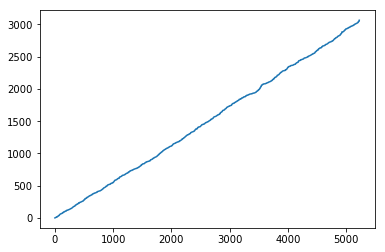

In [11]:
print spike_times[0][0].shape
print spike_times[0][0][:10]
spike_times.shape
plt.plot(spike_times[0][0])

## User Inputs

In [4]:
dt=.05 #Size of time bins (in seconds)
t_start=vel_times[0] #Time to start extracting data - here the first time velocity was recorded
t_end=vel_times[-1] #Time to finish extracting data - here the last time velocity was recorded
downsample_factor=1 #Downsampling of output (to make binning go faster). 1 means no downsampling.

## Put data in binned format

In [5]:
#When loading the Matlab cell "spike_times", Python puts it in a format with an extra unnecessary dimension
#First, we will put spike_times in a cleaner format: an array of arrays
spike_times=np.squeeze(spike_times)
# Tracer()() 
for i in range(spike_times.shape[0]):
#     Tracer()()
    spike_times[i]=np.squeeze(spike_times[i])

In [12]:
print spike_times[-1]
spike_times.dtype
# plt.eventplot(spike_times[0][0:10]) 
vel_times.shape

[  9.40000000e-03   3.15000000e-02   7.69666667e-02 ...,   3.07076027e+03
   3.07077337e+03   3.07078843e+03]


(306700, 1)

In [13]:
###Preprocessing to put spikes and output in bins###

#Bin neural data using "bin_spikes" function
neural_data=bin_spikes(spike_times,dt,t_start,t_end)

#Bin output (velocity) data using "bin_output" function
vels_binned=bin_output(vels,vel_times,dt,t_start,t_end,downsample_factor)

In [26]:
print vel_times[0]
print vels_binned[0]
vels.shape

[ 1.17]
[ 0.15103741  0.15091241]


(306700, 2)

## Save Data

In [24]:
import pickle

data_folder='' #FOLDER YOU WANT TO SAVE THE DATA TO
data_folder='/Users/paulmiddlebrooks/Dropbox/local_data/' 

with open(data_folder+'example_data_s1.pickle','wb') as f:
    pickle.dump([neural_data,vels_binned],f)